# Public datasets for retinal vessel segmentation

---

This notebook showcase the usage of some retinal vessel segmentation datasets for pytorch.

[CHASEDB1](https://blogs.kingston.ac.uk/retinal/chasedb1/)

[DRIVE](http://www.isi.uu.nl/Research/Databases/DRIVE/)

[STARE](http://cecas.clemson.edu/~ahoover/stare/)

[HRF](https://www5.cs.fau.de/research/data/fundus-images/)

[ARIA](https://eyecharity.weebly.com/aria_online.html) (work in progress)

In [1]:
# setup path environment
import os
import sys

project_dir, _ = os.path.split(os.getcwd())
if project_dir not in sys.path:
    sys.path.append(project_dir)

# import packages for data manipulation and drawing
import pandas as pd
import numpy as np
import scipy as sp

# for ploting inline on the notebook
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('paper', font_scale=1.5)

from PIL import Image
import torch
from torch.nn import functional as F
from torchvision.transforms import functional as TF


In [2]:
# plot sample of dataset given index
def plot_sample(dataset, idx):
    def prepare_image(image):
        if isinstance(image, torch.Tensor):
            image = np.array(TF.to_pil_image(image))
        elif isinstance(image, Image.Image):
            image = np.array(image)
        else:
            raise NotImplementedError
        return image

    sample = dataset[idx]
    for key in dataset.sample_keys:
        locals()[key] = sample[key]
        locals()[key] = prepare_image(locals()[key])
    fig, axes = plt.subplots(1, len(dataset.sample_keys), figsize=(15, 5))
    for i in range(len(dataset.sample_keys)):
        shape = (locals()[dataset.sample_keys[i]]).shape
        if len(shape) == 2:
            axes[i].imshow(locals()[dataset.sample_keys[i]], cmap='gray')
        else:
            axes[i].imshow(locals()[dataset.sample_keys[i]])
        axes[i].set_title('{}, {}'.format(dataset.sample_keys[i], shape))
        axes[i].grid(None)

    return fig
        
# plot samples of dataset by order given number of samples to plot
def plot_dataset(dataset, num_sample=None):
    for index in range(len(dataset)):
        if num_sample is None or index < num_sample:
            plot_sample(dataset, index)
            

## CHASE_DB1 dataset

`CHASEDB1PILDataset` module handles:
    - download comprised source data
    - extract source data
    
`CHASEDB1Dataset` module handles:
    - split subsets for training and validation by leave out some samples
    - preprocessings and data augmentations
    

In [3]:
from src.datasets.chasedb1_dataset import CHASEDB1PILDataset
from src.datasets.chasedb1_dataset import CHASEDB1Dataset

data_root = '../data'

chase_pil_dataset = CHASEDB1PILDataset(data_root, download=False, extract=False)
print('The CHASEDB1 PIL dataset has {} samples of PIL Image.'.format(len(chase_pil_dataset)))

valid_ids = [0, 1]
test_ids = [2, 3]

chase_train_set = CHASEDB1Dataset(data_root, split_mode='train', valid_ids=valid_ids, test_ids=test_ids,
                                  preprocessing=None, augmentation=None, download=False, extract=False)
chase_valid_set = CHASEDB1Dataset(data_root, split_mode='valid', valid_ids=valid_ids, test_ids=test_ids,
                                  preprocessing=None, augmentation=None, download=False, extract=False)
chase_test_set = CHASEDB1Dataset(data_root, split_mode='test', valid_ids=valid_ids, test_ids=test_ids,
                                 preprocessing=None, augmentation=None, download=False, extract=False)

print('The CHASEDB1 dataset has {} training samples.'.format(len(chase_train_set)))
print('The CHASEDB1 dataset has {} validating samples.'.format(len(chase_valid_set)))
print('The CHASEDB1 dataset has {} testing samples.'.format(len(chase_test_set)))
print('The training indices of CHASEDB1 dataset are {}.'.format(chase_train_set.dataset.indices))
print('The validating indices of CHASEDB1 dataset are {}.'.format(chase_valid_set.dataset.indices))
print('The testing indices of CHASEDB1 dataset are {}.'.format(chase_test_set.dataset.indices))


The CHASEDB1 PIL dataset has 28 samples of PIL Image.
The CHASEDB1 dataset has 24 training samples.
The CHASEDB1 dataset has 2 validating samples.
The CHASEDB1 dataset has 2 testing samples.
The training indices of CHASEDB1 dataset are [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27].
The validating indices of CHASEDB1 dataset are [0, 1].
The testing indices of CHASEDB1 dataset are [2, 3].


In [4]:
# fig = plot_sample(chase_pil_dataset, idx=0)
# fig.savefig('full_figure.png')
# plot_dataset(chase_pil_dataset, num_sample=2)
# plot_sample(chase_valid_set, idx=-1)
# plot_sample(chase_train_set, idx=0)
# plot_dataset(chase_train_set, num_sample=2)

## DRIVE dataset 

`DRIVEPILDataset` module handles:
    - download comprised source data
    - extract source data
    - split training and validation set by the same setting as the official setup
    
`DRIVEDataset` module handles:
    - preprocessings and data augmentations

In [5]:
from src.datasets.drive_dataset import DRIVEPILDataset
from src.datasets.drive_dataset import DRIVEDataset

drive_pil_train_set = DRIVEPILDataset(data_root, split_mode='train', download_code=None, download=False, extract=False)
drive_pil_valid_set = DRIVEPILDataset(data_root, split_mode='valid', download_code=None, download=False, extract=False)
drive_pil_test_set = DRIVEPILDataset(data_root, split_mode='test', download_code=None, download=False, extract=False)

print('The DRIVE dataset has {} training samples.'.format(len(drive_pil_train_set)))
# print('The DRIVE dataset has {} validating samples.'.format(len(drive_pil_valid_set)))
print('The DRIVE dataset has {} testing samples.'.format(len(drive_pil_test_set)))

drive_train_set = DRIVEDataset(data_root, split_mode='train', preprocessing=None, augmentation=None)
drive_valid_set = DRIVEDataset(data_root, split_mode='valid', preprocessing=None, augmentation=None)
drive_test_set = DRIVEDataset(data_root, split_mode='test', preprocessing=None, augmentation=None)

print('The DRIVE dataset has {} training samples.'.format(len(drive_train_set)))
# print('The DRIVE dataset has {} validating samples.'.format(len(drive_valid_set)))
print('The DRIVE dataset has {} testing samples.'.format(len(drive_pil_test_set)))


The DRIVE dataset has 20 training samples.
The DRIVE dataset has 20 testing samples.
The DRIVE dataset has 20 training samples.
The DRIVE dataset has 20 testing samples.


In [6]:
# plot_sample(drive_pil_train_set, 0)
# plot_dataset(drive_pil_valid_set, 2)
# plot_sample(drive_valid_set, 0)
# plot_sample(drive_train_set, 0)
# plot_dataset(drive_valid_set, 2)

In [7]:
from src.processings.preprocessings import normalization
from src.datasets.utils.get_dataset_statistics import get_channel_mean_std

channel_mean, channel_std = get_channel_mean_std(drive_train_set, 'image')

from functools import partial
normalization_method_1 = partial(
    normalization, **{'channel_mean': [0.5, 0.5, 0.5], 'channel_std': [0.5, 0.5, 0.5]})


normalization_method_2 = partial(
    normalization, **{'channel_mean': channel_mean, 'channel_std': channel_std})

normalized_1 = DRIVEDataset(data_root, split_mode='train', preprocessing=normalization_method_1)
normalized_2 = DRIVEDataset(data_root, split_mode='train', preprocessing=normalization_method_2)

print('normalized mean: {} and std: {}'.format(*get_channel_mean_std(normalized_1, 'image')))

normalized mean: [0.3915727436542511, 0.47059696912765503, 0.328352689743042] and std: [0.3186357617378235, 0.34020352363586426, 0.19706571102142334]


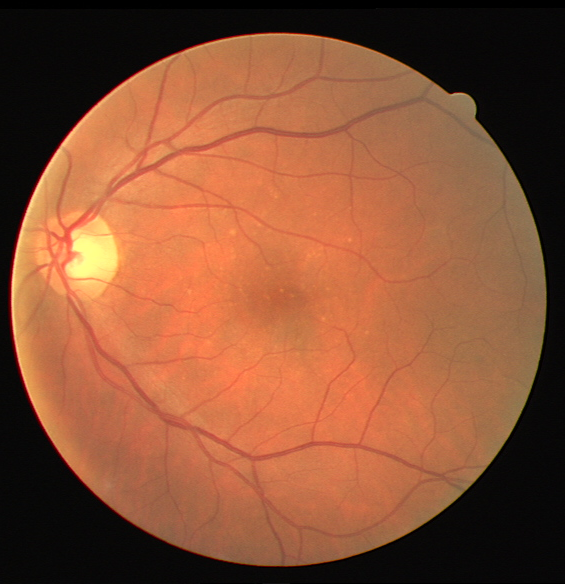

In [8]:
TF.to_pil_image(drive_train_set[0]['image'])

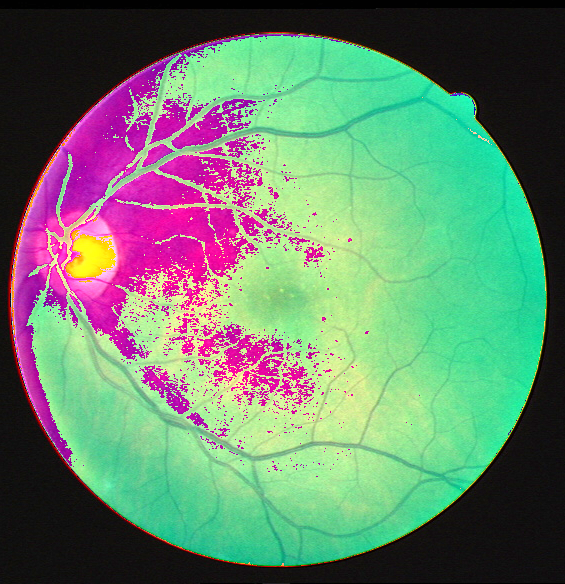

In [9]:
TF.to_pil_image(normalized_1[0]['image'])

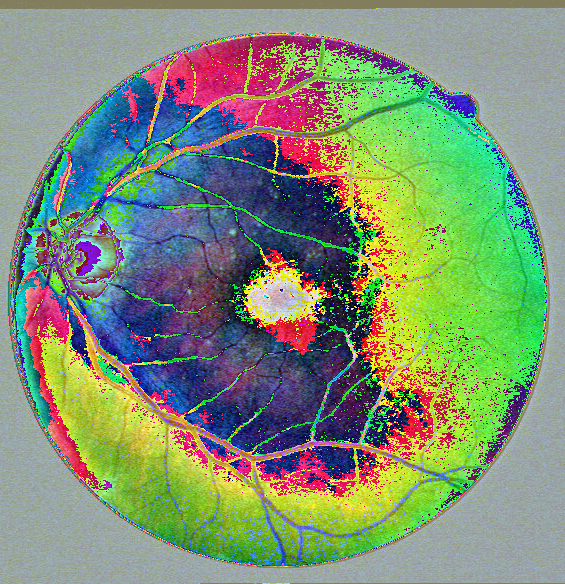

In [10]:
TF.to_pil_image(normalized_2[0]['image'])

## STARE dataset

`STAREPILDataset` module handles:
    - download comprised source data
    - extract source data
    
`STAREDataset` Module handles:
    - preprocessings and data augmentations

In [11]:
from src.datasets.stare_dataset import STAREPILDataset
from src.datasets.stare_dataset import STAREDataset

stare_pil_dataset = STAREPILDataset(data_root, download=False, extract=False)
print('The CHASEDB1 PIL dataset has {} samples of PIL Image.'.format(len(stare_pil_dataset)))

stare_train_set = STAREDataset(data_root, split_mode='train', valid_ids=valid_ids, test_ids=test_ids, preprocessing=None, augmentation=None)
stare_valid_set = STAREDataset(data_root, split_mode='valid', valid_ids=valid_ids, test_ids=test_ids, preprocessing=None, augmentation=None)
stare_test_set = STAREDataset(data_root, split_mode='test', valid_ids=valid_ids, test_ids=test_ids, preprocessing=None, augmentation=None)

print('The STARE dataset has {} training samples.'.format(len(stare_train_set)))
print('The STARE dataset has {} validating samples.'.format(len(stare_valid_set)))
print('The STARE dataset has {} testing samples.'.format(len(stare_test_set)))
print('The training indices of STARE dataset are {}.'.format(stare_train_set.dataset.indices))
print('The validating indices of STARE dataset are {}.'.format(stare_valid_set.dataset.indices))
print('The testing indices of STARE dataset are {}.'.format(stare_test_set.dataset.indices))

The CHASEDB1 PIL dataset has 20 samples of PIL Image.
The STARE dataset has 16 training samples.
The STARE dataset has 2 validating samples.
The STARE dataset has 2 testing samples.
The training indices of STARE dataset are [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19].
The validating indices of STARE dataset are [0, 1].
The testing indices of STARE dataset are [2, 3].


In [12]:
# plot_sample(stare_pil_dataset, 0)
# plot_dataset(stare_pil_dataset, 2)
# plot_sample(stare_train_set, 0)
# plot_sample(stare_valid_set, 0)
# plot_dataset(stare_valid_set, 2)

## HRF dataset

`HRFPILDataset` module handles:
    - download comprised source data
    - extract source data
    - selecting different types of data
    
`HRFDataset` module handles:
    - preprocessings and data augmentations

In [13]:
from src.datasets.hrf_dataset import HRFPILDataset
from src.datasets.hrf_dataset import HRFDataset

for data_type in ['diabetic', 'glaucoma', 'healthy', 'all']:
    hrf_pil_dataset = HRFPILDataset(data_root, data_type, download=False, extract=False)
    print('The HRF PIL dataset has {} PIL Image samples of type: {}.'.format(len(hrf_pil_dataset), data_type))

hrf_train_set = HRFDataset(data_root, split_mode='train', valid_ids=valid_ids, test_ids=test_ids, data_type='all', 
                           preprocessing=None, augmentation=None)
hrf_valid_set = HRFDataset(data_root, split_mode='valid', valid_ids=valid_ids, test_ids=test_ids, data_type='all',
                           preprocessing=None, augmentation=None)
hrf_test_set = HRFDataset(data_root, split_mode='test', valid_ids=valid_ids, test_ids=test_ids, data_type='all',
                          preprocessing=None, augmentation=None)

print('The HRF dataset has {} training samples.'.format(len(hrf_train_set)))
print('The HRF dataset has {} validating samples.'.format(len(hrf_valid_set)))
print('The HRF dataset has {} testing samples.'.format(len(hrf_test_set)))

print('The training indices of STARE dataset are {}.'.format(hrf_train_set.dataset.indices))
print('The validating indices of STARE dataset are {}.'.format(hrf_valid_set.dataset.indices))
print('The testing indices of STARE dataset are {}.'.format(hrf_test_set.dataset.indices))

The HRF PIL dataset has 15 PIL Image samples of type: diabetic.
The HRF PIL dataset has 15 PIL Image samples of type: glaucoma.
The HRF PIL dataset has 15 PIL Image samples of type: healthy.
The HRF PIL dataset has 45 PIL Image samples of type: all.
The HRF dataset has 41 training samples.
The HRF dataset has 2 validating samples.
The HRF dataset has 2 testing samples.
The training indices of STARE dataset are [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44].
The validating indices of STARE dataset are [0, 1].
The testing indices of STARE dataset are [2, 3].


In [14]:
# plot_sample(hrf_pil_dataset, 0)
# plot_dataset(hrf_pil_dataset, 2)
# plot_sample(hrf_train_set, 0)
# plot_sample(hrf_valid_set, 0)
# plot_dataset(hrf_train_set, 2)